In [1]:
sentence1 = "A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story ."

In [2]:
from nltk import word_tokenize
token = word_tokenize(sentence1)
token

['A',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 ',',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amounts',
 'to',
 'much',
 'of',
 'a',
 'story',
 '.']

In [3]:
from nltk import pos_tag
tagged = pos_tag(token)
tagged

[('A', 'DT'),
 ('series', 'NN'),
 ('of', 'IN'),
 ('escapades', 'NNS'),
 ('demonstrating', 'VBG'),
 ('the', 'DT'),
 ('adage', 'NN'),
 ('that', 'IN'),
 ('what', 'WP'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('goose', 'NN'),
 ('is', 'VBZ'),
 ('also', 'RB'),
 ('good', 'JJ'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('gander', 'NN'),
 (',', ','),
 ('some', 'DT'),
 ('of', 'IN'),
 ('which', 'WDT'),
 ('occasionally', 'RB'),
 ('amuses', 'VBZ'),
 ('but', 'CC'),
 ('none', 'NN'),
 ('of', 'IN'),
 ('which', 'WDT'),
 ('amounts', 'NNS'),
 ('to', 'TO'),
 ('much', 'JJ'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('story', 'NN'),
 ('.', '.')]

In [4]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

cleaned_token = []

for word in token:
    if word not in stop_words:
        cleaned_token.append(word)

print('Unclean version:', token)
print('\nCleaned version:', cleaned_token)

Unclean version: ['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.']

Cleaned version: ['A', 'series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', ',', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story', '.']


In [5]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed = [stemmer.stem(word) for word in token]
print(" ".join(stemmed))

a seri of escapad demonstr the adag that what is good for the goos is also good for the gander , some of which occasion amus but none of which amount to much of a stori .


In [6]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

lemmatized_output = [lemmatizer.lemmatize(word) for word in token]
print(" ".join(lemmatized_output))

A series of escapade demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amount to much of a story .


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('data7.tsv', sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [10]:
data.value_counts()

PhraseId  SentenceId  Phrase                                                                                                                                                                                        Sentiment
1         1           A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .  1            1
104044    5487        exist without the precedent of Yiddish theater , whose jolly , fun-for-fun 's - sake communal spirit goes to the essence of Broadway                                                          2            1
104037    5487        American musical comedy as we                                                                                                                                                                 2            1
104038    5487        American musical comedy                                                    

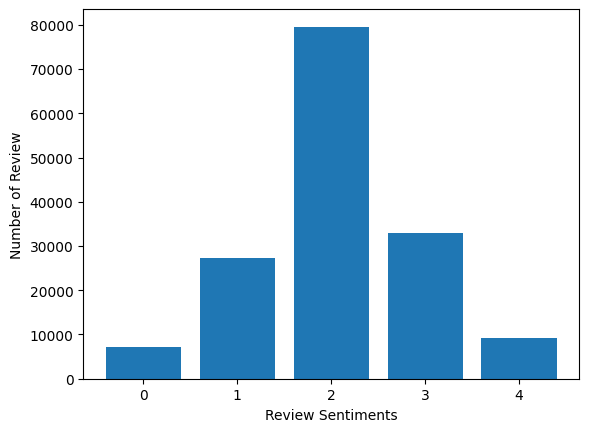

In [11]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

c:\Users\VIPER\Documents\Projects\Academic\Practical SEM VI\DSBDA\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [16]:
print(text_tf)

  (0, 12857)	0.12785637560254456
  (0, 8807)	0.1353879543646446
  (0, 13681)	0.07615285026452821
  (0, 593)	0.22068902883834374
  (0, 9085)	0.1898515417082945
  (0, 1879)	0.11034437734762885
  (0, 602)	0.26341877863818697
  (0, 9204)	0.19301332592202286
  (0, 14888)	0.28701927784529135
  (0, 12424)	0.1381592967010513
  (0, 5595)	0.265796263188737
  (0, 529)	0.1614381914318891
  (0, 5837)	0.22883807138484064
  (0, 5323)	0.20344769269023563
  (0, 5821)	0.2625302862532789
  (0, 7217)	0.17522921677393963
  (0, 14871)	0.1354415412970302
  (0, 13503)	0.08982508036989033
  (0, 288)	0.251134096800077
  (0, 13505)	0.17690005957760713
  (0, 3490)	0.2485059095620638
  (0, 4577)	0.278538658922562
  (0, 9227)	0.27061683772839323
  (0, 11837)	0.1761994204821687
  (1, 5837)	0.3782714454401254
  :	:
  (156050, 11465)	0.670263619653983
  (156050, 625)	0.2115725833396903
  (156050, 13505)	0.18632379802617538
  (156051, 9193)	0.6987248068627274
  (156051, 11465)	0.6822102168950972
  (156051, 625)	0.21534

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=1)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5853090691614337
